In [17]:
# Required Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adadelta
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from IPython.display import display, Image
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
mnist_train = pd.read_csv("/content/gdrive/My Drive/projects_data/train.csv")
mnist_test = pd.read_csv("/content/gdrive/My Drive/projects_data/test.csv")

In [6]:
mnist_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Changing data to fit for the requirement
mnist_train_data = mnist_train.loc[:, "pixel0":]
mnist_train_label = mnist_train.loc[:, "label"]

mnist_train_data = mnist_train_data/255.0
mnist_test = mnist_test/255.0

mnist_train_data = np.array(mnist_train_data)
mnist_train_label = np.array(mnist_train_label)

mnist_train_data = mnist_train_data.reshape(mnist_train_data.shape[0], 28, 28, 1)
print(mnist_train_data.shape, mnist_train_label.shape)

In [13]:
nclasses = mnist_train_label.max() - mnist_train_label.min() + 1
mnist_train_label = to_categorical(mnist_train_label, num_classes = nclasses)
print("Shape of ytrain after encoding: ", mnist_train_label.shape)

Shape of ytrain after encoding:  (42000, 10)


In [14]:
#CNN Model
def build_model(input_shape=(28, 28, 1)):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    return model

    
def compile_model(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
    
    
def train_model(model, train, test, epochs, split):
    history = model.fit(train, test, shuffle=True, epochs=epochs, validation_split=split)
    return history

    
# Training the model using the above function built to build, compile and train the model
cnn_model = build_model((28, 28, 1))
compile_model(cnn_model, 'adam', 'categorical_crossentropy')

# train the model for as many epochs as you want but I found training it above 80 will not help us and eventually increase overfitting.
model_history = train_model(cnn_model, mnist_train_data, mnist_train_label, 80, 0.2)

Epoch 1/80
1050/1050 [==============================] - 14s 13ms/step - loss: 0.2465 - accuracy: 0.9265 - val_loss: 0.0569 - val_accuracy: 0.9829
Epoch 2/80
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0887 - accuracy: 0.9736 - val_loss: 0.0433 - val_accuracy: 0.9857
Epoch 3/80
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0662 - accuracy: 0.9791 - val_loss: 0.0428 - val_accuracy: 0.9861
Epoch 4/80
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0571 - accuracy: 0.9822 - val_loss: 0.0340 - val_accuracy: 0.9902
Epoch 5/80
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0322 - val_accuracy: 0.9910
Epoch 6/80
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0289 - val_accuracy: 0.9923
Epoch 7/80
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0453 - accuracy: 0.9864 - val_loss: 0.0286 -

In [18]:
def plot_model_performance(metric, validations_metric):
    plt.plot(model_history.history[metric],label = str('Training ' + metric))
    plt.plot(model_history.history[validations_metric],label = str('Validation ' + metric))
    plt.legend()
    plt.savefig(str(metric + '_plot.png'))

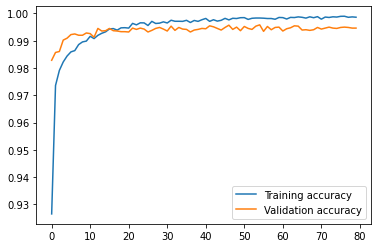

In [19]:
plot_model_performance('accuracy', 'val_accuracy')

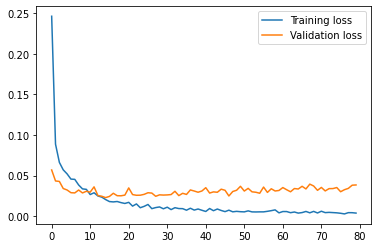

In [20]:
plot_model_performance('loss', 'val_loss')

In [24]:
model_name = 'cnn_mnist.h5'

cnn_model.save(model_name)

In [26]:
model_test = load_model('cnn_mnist.h5')

In [31]:
# load and prepare the image
def load_image(filename):
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    return img

In [42]:
# Testing
def run_example():
    img = load_image('/content/gdrive/My Drive/projects_data/two.png')
    model_test = load_model('cnn_mnist.h5')
    digit = model_test.predict_classes(img)
    print(digit)
    print(digit[0])
 
# entry point, run the example
run_example()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[2]
2


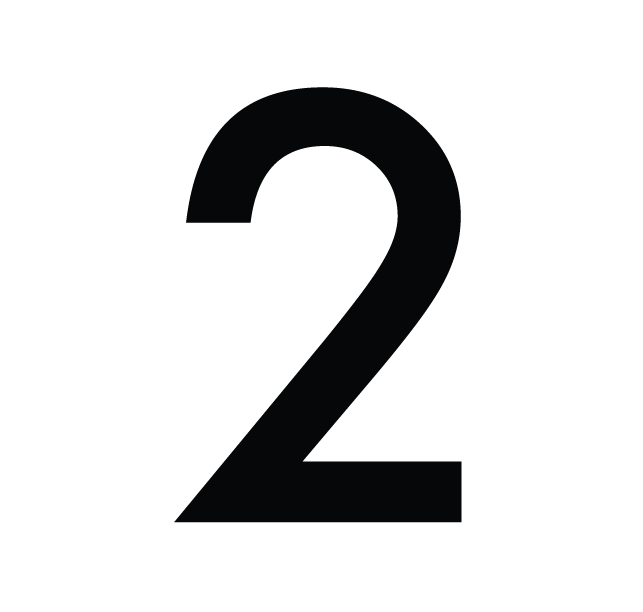

In [45]:
display(Image(filename='/content/gdrive/My Drive/projects_data/two.png'))